<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Train_data_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train HOG

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd

# Đọc dữ liệu từ drive

In [ ]:
# Lấy đường dẫn đến các file csv
link_X_train = '/content/drive/MyDrive/My Data/Save_Data/X_train_HOG.csv'
link_Y_train = '/content/drive/MyDrive/My Data/Save_Data/Y_train_HOG.csv'
link_X_vali = '/content/drive/MyDrive/My Data/Save_Data/X_val_HOG.csv'
link_Y_vali = '/content/drive/MyDrive/My Data/Save_Data/Y_val_HOG.csv'

In [ ]:
# Đọc và chuyển dữ liệu sang ndarray
X_train = pd.read_csv(link_X_train,header=None).to_numpy()
Y_train = pd.read_csv(link_Y_train,header=None).to_numpy()
X_vali = pd.read_csv(link_X_vali,header=None).to_numpy()
Y_vali = pd.read_csv(link_Y_vali,header=None).to_numpy()

In [ ]:
# Kích thước dữ liệu
print(len(X_train),len(Y_train))
print(len(X_vali),len(Y_vali))

20740 20740
5229 5229


In [ ]:
labels = os.listdir('/content/drive/MyDrive/My Data/Do_An_Images')
labels = sorted(labels)
print(labels)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


# DÙng model

Bernouli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
#y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.4652897303499713


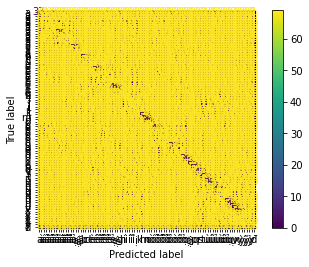

              precision    recall  f1-score   support

           a       0.90      0.82      0.86        45
          à       0.42      0.55      0.48        44
          á       0.22      0.16      0.18        44
          â       0.48      0.49      0.49        63
         ầ       0.28      0.35      0.31        49
         ấ       0.43      0.36      0.39        55
         ẫ       0.31      0.24      0.27        42
         ẩ       0.35      0.36      0.36        33
          ã       0.24      0.22      0.23        45
          ă       0.51      0.52      0.52        67
         ằ       0.38      0.38      0.38        52
         ắ       0.33      0.27      0.30        52
         ẵ       0.41      0.30      0.34        44
         ẳ       0.18      0.28      0.22        32
          ả       0.38      0.41      0.40        39
          ạ       0.79      0.88      0.83        42
         ậ       0.54      0.59      0.56        46
         ặ       0.72    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.6618856377892522


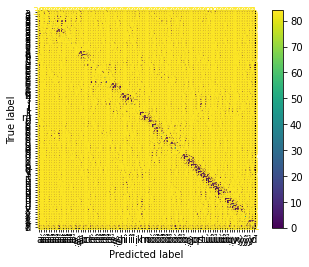

              precision    recall  f1-score   support

           a       0.95      0.87      0.91        45
          à       0.73      0.68      0.71        44
          á       0.51      0.48      0.49        44
          â       0.74      0.63      0.68        63
         ầ       0.49      0.47      0.48        49
         ấ       0.53      0.56      0.54        55
         ẫ       0.56      0.52      0.54        42
         ẩ       0.43      0.48      0.46        33
          ã       0.42      0.36      0.39        45
          ă       0.65      0.72      0.68        67
         ằ       0.50      0.56      0.53        52
         ắ       0.54      0.54      0.54        52
         ẵ       0.44      0.39      0.41        44
         ẳ       0.34      0.34      0.34        32
          ả       0.69      0.56      0.62        39
          ạ       0.89      0.95      0.92        42
         ậ       0.71      0.63      0.67        46
         ặ       0.78    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)